<a href="https://www.kaggle.com/code/jamesmonterozo/playground-pse-2011-2021q1?scriptVersionId=96110024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Philippine Stock Exchange Data (2011 - Q1 of 2021)

**THIS IS A TEST NOTEBOOK WHERE I MESS AROUND WITH THE THINGS I'M LEARNING!**

This notebook focuses on analyzing and visualizing data from the Philippine Stock Exchange based on data last updated in Q1 of 2021.

**IMPORTING AND LIST OF FILES**

This imports all libraries needed and displayes the files being used for the notebook.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/philippines-stock-exchange-dataset/stocks.csv


**READING AND CLEANING**

Here, the CSV file is read into a pandas Data Fram and simple cleaning methods are conducted. First, the columns *Price*, *Open*, *High*, and *Low* are converted into floats as some values with commas (,) are seen as strings. After which, the *Volume* column is turned into numbers since letters were initially used to indicate the Volume of trades (K = Thousands, M = Millions, B = Billions).

The tables are displayed after each cleaning process is completed.

In [2]:
filename = "/kaggle/input/philippines-stock-exchange-dataset/stocks.csv"
pse = pd.read_csv(filename)

cols_tofloat = ["Price", "Open", "High", "Low"]
for col in cols_tofloat :
    pse[col] = pse[col].astype("string")
    pse[col] = pse[col].str.replace(",", "").astype("float64")

display(pse.nlargest(10, "Price"))

def str_toLarge (x):
    if x[-1] == "K" :
        return float(x.rstrip("K")) * 10**2
    elif x[-1] == "M" :
        return float(x.rstrip("M")) * 10**5
    elif x[-1] == "B" :
        return float(x.rstrip("B")) * 10**8
pse["Volume"] = pse["Volume"].apply(str_toLarge)

display(pse.nsmallest(10, "Volume"))

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Stock Name,Code,Date,Price,Open,High,Low,Volume,Change%
285666,PLDT Inc,TEL,"Sep 04, 2014",3430.90,3413.06,3456.69,3411.07,260.14K,0.58%
285670,PLDT Inc,TEL,"Aug 29, 2014",3420.99,3365.46,3420.99,3331.75,4.74M,1.83%
285667,PLDT Inc,TEL,"Sep 03, 2014",3411.07,3315.88,3422.97,3315.88,470.93K,2.87%
285664,PLDT Inc,TEL,"Sep 08, 2014",3401.16,3389.26,3411.07,3389.26,277.30K,0.23%
285665,PLDT Inc,TEL,"Sep 05, 2014",3393.22,3432.89,3432.89,3387.27,365.98K,-1.10%
285672,PLDT Inc,TEL,"Aug 27, 2014",3383.31,3359.51,3383.31,3357.53,844.25K,0.65%
285663,PLDT Inc,TEL,"Sep 09, 2014",3375.38,3375.38,3389.26,3341.66,227.30K,-0.76%
285673,PLDT Inc,TEL,"Aug 26, 2014",3361.49,3292.08,3385.29,3292.08,841.90K,2.73%
285671,PLDT Inc,TEL,"Aug 28, 2014",3359.51,3373.39,3375.38,3339.68,753.20K,-0.70%
285662,PLDT Inc,TEL,"Sep 10, 2014",3349.59,3361.49,3375.38,3345.63,312.45K,-0.76%


,Stock Name,Code,Date,Price,Open,High,Low,Volume,Change%
269995,San Miguel Corp Pref 2,SMC2H,"Jan 11, 2021",76.00,76.00,76.00,76.00,1.0,0.00%
270078,San Miguel Corp Pref 2,SMC2H,"Jul 07, 2020",77.00,77.00,77.00,77.00,1.0,1.32%
270265,San Miguel Corp Pref 2,SMC2H,"Jul 10, 2019",73.85,73.85,73.85,73.85,1.0,0.07%
270324,San Miguel Corp Pref 2,SMC2H,"Feb 22, 2019",72.25,72.25,72.25,72.25,1.0,0.07%
270345,San Miguel Corp Pref 2,SMC2H,"Jan 09, 2019",74.30,74.30,74.30,74.30,1.0,3.19%
270348,San Miguel Corp Pref 2,SMC2H,"Dec 26, 2018",74.00,74.00,74.00,74.00,1.0,1.02%
270536,San Miguel Corp Pref 2,SMC2H,"Dec 20, 2017",76.15,76.15,76.15,76.15,1.0,-4.03%
270679,San Miguel Corp Pref 2,SMC2H,"Apr 11, 2017",78.50,78.50,78.50,78.50,1.0,0.51%
270749,San Miguel Corp Pref 2,SMC2H,"Nov 24, 2016",77.95,77.95,77.95,77.95,1.0,0.58%
313664,San Miguel Corp Pref,SMC2G,"Dec 16, 2020",76.00,76.00,76.00,76.00,1.0,1.13%


**MONTH AND YEAR EXTRACTION**

For future use, the month and years from the *Date* column are extracted and added to their own respective columns.

In [3]:
pse["Date"] = pd.to_datetime(pse["Date"])
pse["Year"] = pse["Date"].dt.year
pse["Month"] = pse["Date"].dt.month

display(pse.nsmallest(5, "Year"))

,Stock Name,Code,Date,Price,Open,High,Low,Volume,Change%,Year,Month
7418,Oriental Petroleum and Minerals Corp B,OPMB,2011-12-29,0.02,0.02,0.02,0.02,200000.0,0.00%,2011,12
7419,Oriental Petroleum and Minerals Corp B,OPMB,2011-12-28,0.02,0.02,0.02,0.02,1810000.0,0.00%,2011,12
7420,Oriental Petroleum and Minerals Corp B,OPMB,2011-12-27,0.02,0.02,0.02,0.02,1500000.0,0.00%,2011,12
7421,Oriental Petroleum and Minerals Corp B,OPMB,2011-12-26,0.02,0.02,0.02,0.02,8170000.0,0.00%,2011,12
7422,Oriental Petroleum and Minerals Corp B,OPMB,2011-12-23,0.02,0.02,0.02,0.02,3200000.0,0.00%,2011,12


**PSE TRADE VOLUME FROM 2011 to 2021 (Q1)**

In the following graph, the trade volumes from 2011 to Q1 of 2021 are plotted in a simple line graph. The graph indicates a large spike in trading activity beginning in 2020. This could indicate a trend in trading volume.

,Year,Volume
0,2011,1.030242e+09
1,2012,6.348230e+10
2,2013,3.686196e+10
3,2014,7.176446e+10
4,2015,4.501287e+10
5,2016,4.248358e+10
6,2017,4.198703e+10
7,2018,3.899627e+10
8,2019,3.108703e+10
9,2020,1.450825e+11


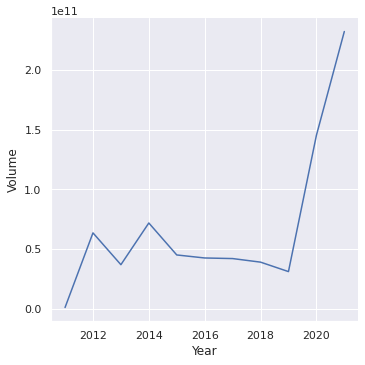

In [4]:
yearly_volume = pse.groupby("Year", as_index=False)["Volume"].sum()

display(yearly_volume)

sns.set()
sns.relplot(x="Year", y="Volume", data=yearly_volume, kind="line")

plt.show()

**MONTHLY TRENDS IN TRADING VOLUME FOR EACH YEAR**

The following example illustrates the volume of trades over each month in the years indicated.

,Year,Month,Volume
0,2011,12,1.030242e+09
1,2012,1,4.516316e+09
2,2012,2,1.236300e+10
3,2012,3,5.382049e+09
4,2012,4,3.634353e+09
...,...,...,...
107,2020,11,1.179915e+10
108,2020,12,9.195667e+10
109,2021,1,1.424972e+11
110,2021,2,4.753383e+10


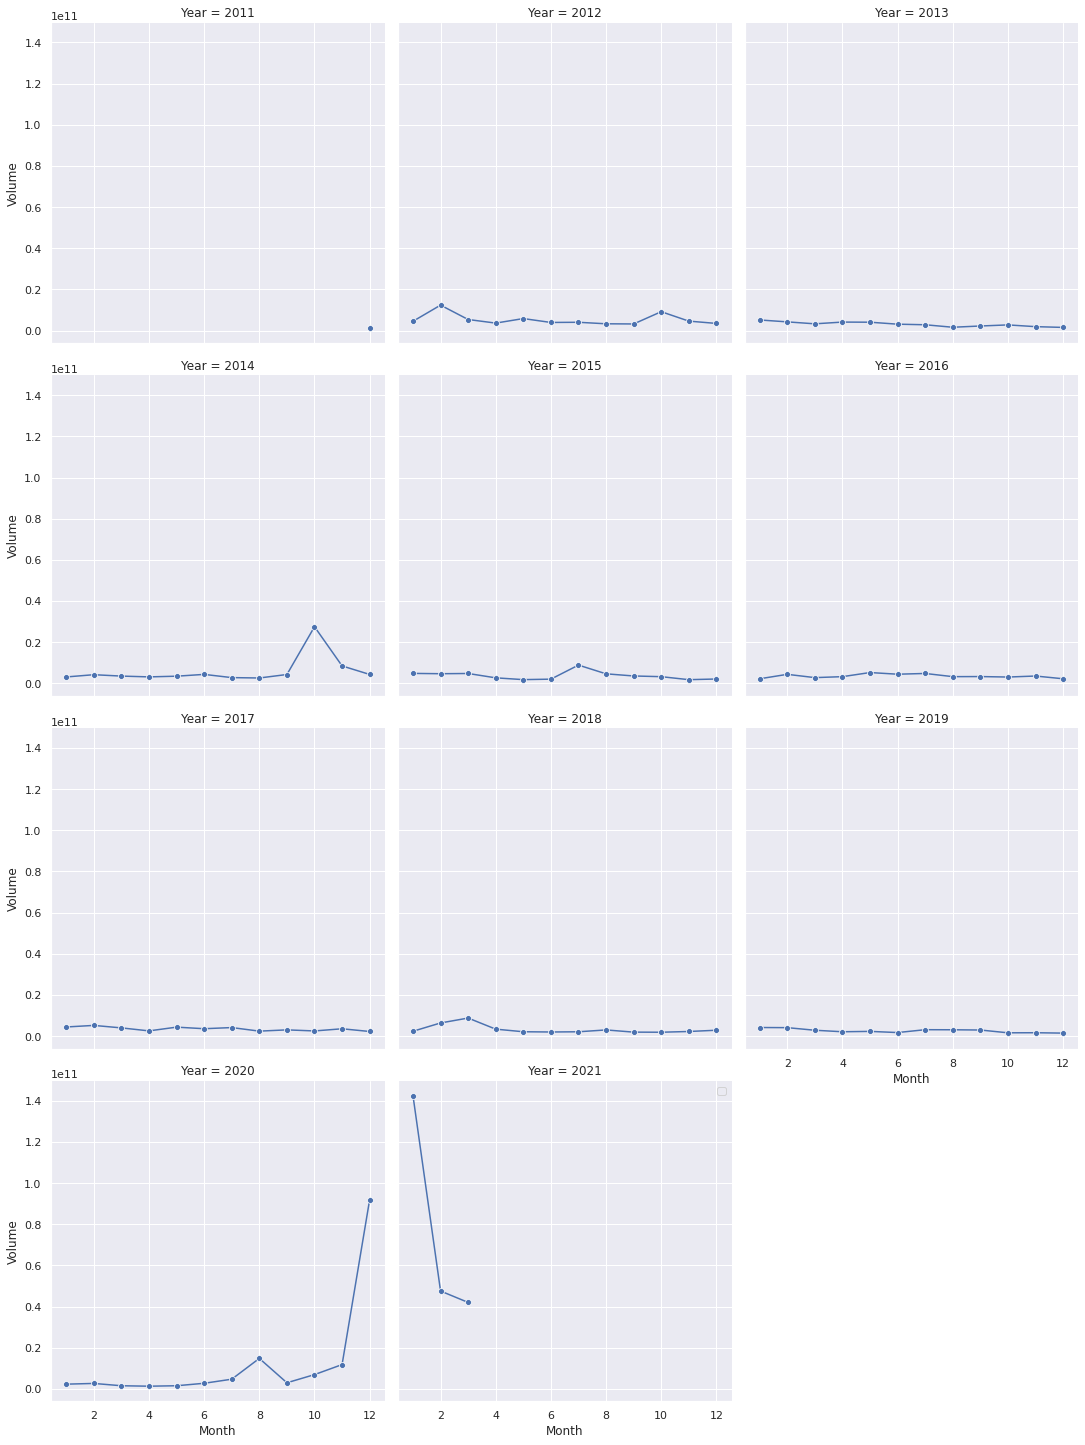

In [5]:
yearmonth_volume = pse.groupby(["Year", "Month"], as_index=False)["Volume"].sum()

display(yearmonth_volume)

sns.relplot(x="Month", y="Volume", data=yearmonth_volume, col="Year", col_wrap=3, kind="line", marker="o")
plt.legend()

plt.show()

**PRE-PANDEMIC ZOOM IN ON TRADING VOLUME**

These charts provide a better view of what the trading volumes during the pre-pandemic years looked like. 2011 was excluded as it only had December's data.

,Year,Month,Volume
0,2011,12,1.030242e+09
1,2012,1,4.516316e+09
2,2012,2,1.236300e+10
3,2012,3,5.382049e+09
4,2012,4,3.634353e+09
...,...,...,...
107,2020,11,1.179915e+10
108,2020,12,9.195667e+10
109,2021,1,1.424972e+11
110,2021,2,4.753383e+10


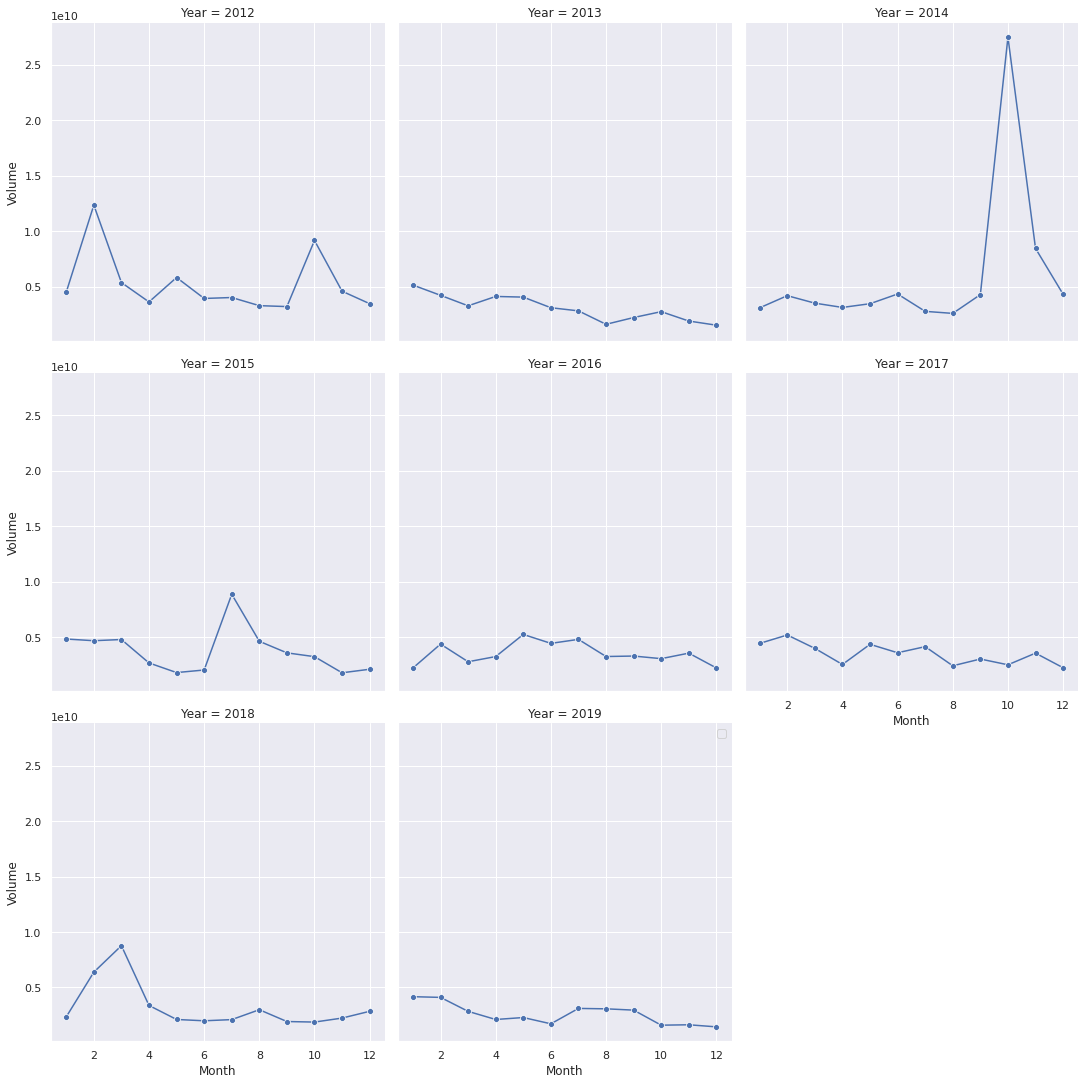

In [6]:
pse_prepan = pse[(pse["Year"] < 2020) & (pse["Year"] > 2011)]
prepan_yearmonth_volume = pse_prepan.groupby(["Year", "Month"], as_index=False)["Volume"].sum()

display(yearmonth_volume)

sns.relplot(x="Month", y="Volume", data=prepan_yearmonth_volume, col="Year", col_wrap=3, kind="line", marker="o")
plt.legend()

plt.show()